In [1]:
import numpy as np
import pandas as pd

RANDOM_SEED = 42

### Specify Paths

In [2]:
data_path = './data/data.csv'
model_path = './model'
log_file = 'logmod.pkl'

### Load training Data

In [3]:
df = pd.read_csv(data_path, low_memory=False)
df

,label,T-31_P0x,T-31_P0y,T-31_P0z,T-31_P1x,T-31_P1y,T-31_P1z,T-31_P2x,T-31_P2y,T-31_P2z,...,T-0_P17z,T-0_P18x,T-0_P18y,T-0_P18z,T-0_P19x,T-0_P19y,T-0_P19z,T-0_P20x,T-0_P20y,T-0_P20z
0,1.0,0.515261,0.522433,1.175448e-07,0.497493,0.484558,-0.006219,0.488386,0.438089,-0.009695,...,-0.017502,0.527051,0.373574,-0.025206,0.522634,0.351043,-0.028462,0.517234,0.331246,-0.030454
1,1.0,0.512071,0.525142,7.155288e-08,0.486010,0.507603,-0.008274,0.466830,0.471264,-0.012303,...,-0.017896,0.582152,0.401804,-0.024307,0.592346,0.382315,-0.026803,0.601037,0.365683,-0.028385
2,1.0,0.526035,0.538470,-6.282853e-08,0.500776,0.505372,-0.007828,0.484524,0.462951,-0.013429,...,-0.015140,0.573421,0.401325,-0.021049,0.582498,0.381868,-0.023110,0.590693,0.364288,-0.024354
3,1.0,0.518246,0.528164,5.977805e-08,0.498436,0.497890,-0.008777,0.484721,0.454298,-0.014273,...,-0.018264,0.557811,0.365809,-0.023875,0.565904,0.344100,-0.025050,0.572534,0.326821,-0.025625
4,1.0,0.509820,0.499052,9.852938e-08,0.489351,0.465295,-0.007495,0.477290,0.419927,-0.011518,...,-0.015224,0.601553,0.383937,-0.020833,0.613516,0.369314,-0.022855,0.624135,0.355479,-0.024308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2798,0.0,0.311663,0.381542,3.007697e-09,0.323388,0.388885,-0.024233,0.325207,0.406817,-0.037163,...,-0.016753,0.517615,0.495412,-0.020226,0.511367,0.509717,-0.019567,0.506121,0.518266,-0.018560
2799,0.0,0.516603,0.404646,-1.078517e-10,0.498282,0.410329,-0.006725,0.487193,0.433626,-0.012864,...,-0.025932,0.292837,0.452018,-0.035882,0.301726,0.455832,-0.038365,0.307693,0.455042,-0.039402
2800,0.0,0.306994,0.383043,-5.903936e-11,0.321414,0.387462,-0.027101,0.323512,0.402837,-0.043963,...,-0.006118,0.415326,0.394004,-0.010760,0.420534,0.410440,-0.013592,0.426438,0.420918,-0.015554
2801,0.0,0.695509,0.391370,3.132685e-10,0.676726,0.399175,-0.012305,0.666149,0.424050,-0.019562,...,-0.003812,0.380042,0.509635,-0.008393,0.385428,0.521761,-0.011230,0.390880,0.528661,-0.012841


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:],
                                                    df['label'],
                                                    random_state=42,
                                                    test_size=0.2,
                                                    shuffle=True)
X_train, X_test, y_train, y_test = X_train.values, X_test.values, y_train.values, y_test.values

In [14]:
SAMPLE = np.array(X_test[42]).reshape(1,-1)
SAMPLE

array([[ 5.08381188e-01,  3.60467613e-01,  9.29551973e-08, ...,
         5.09943724e-01,  4.28651512e-01, -1.02713304e-02]])

In [15]:
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt

sns.set(rc={"figure.figsize":(6, 5)})

def print_stats(y_pred):
    print(f'accuracy:\t {metrics.accuracy_score(y_test, y_pred)}')
    print(f'precision:\t {metrics.precision_score(y_test, y_pred, average="macro")}')
    print(f'recall:\t\t {metrics.recall_score(y_test, y_pred, average="macro")}')
    print(f'f-score:\t {metrics.f1_score(y_test, y_pred, average="macro")}')
    cf_matrix = metrics.confusion_matrix(y_test, y_pred)
    cf_matrix_n = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cf_matrix, cmap='Greens', annot=True)
    plt.ylabel('Actual', size=14)
    plt.xlabel('Predicted', size=14)
    plt.title('confusion matrix', size=18)
    plt.show(block=False)
    sns.heatmap(cf_matrix_n, cmap='Blues', annot=True)
    plt.ylabel('Actual', size=14)
    plt.xlabel('Predicted', size=14)
    plt.title('confusion matrix percentages', size=18)
    plt.show(block=False)

### Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

log_regression = LogisticRegression(max_iter=1000)
log_regression.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

accuracy:	 0.9554367201426025
precision:	 0.953181541424182
recall:		 0.9494874728627588
f-score:	 0.9509074254215433


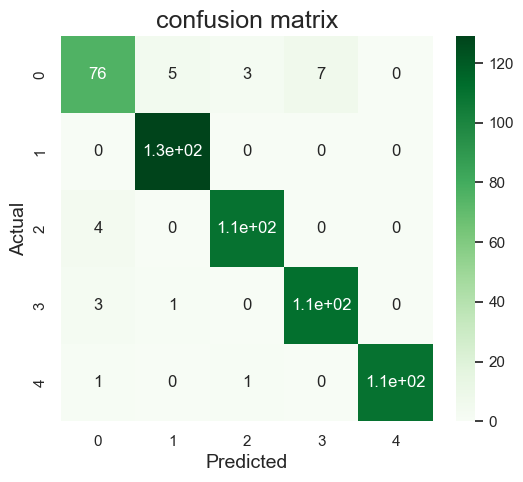

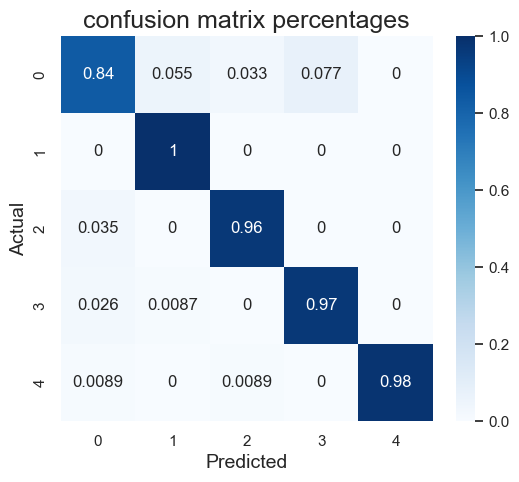

In [17]:
print_stats(log_regression.predict(X_test))

In [9]:
%%timeit -n 10000
log_regression.predict_proba(SAMPLE)

122 µs ± 7.16 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### SVM

In [10]:
from sklearn.svm import SVC

svm = SVC(max_iter=1000, probability=True)
svm.fit(X_train, y_train)

SVC(max_iter=1000, probability=True)

accuracy:	 0.839572192513369
precision:	 0.8666770452619994
recall:		 0.8137089169411823
f-score:	 0.7976296233751722


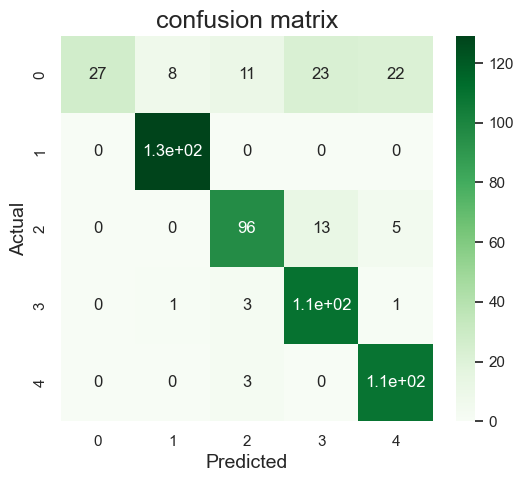

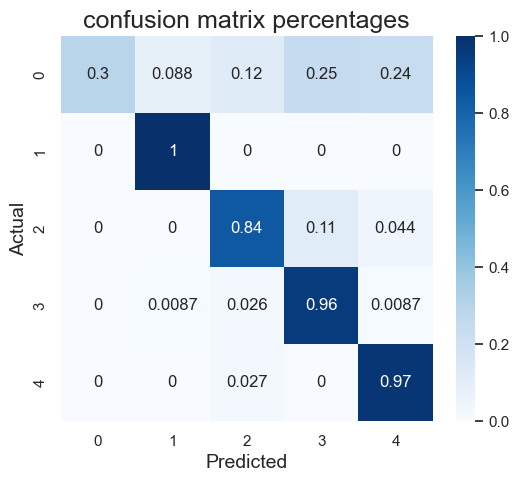

In [11]:
print_stats(svm.predict(X_test))

In [12]:
%%timeit -n 10000
svm.predict_proba(SAMPLE)

KeyboardInterrupt: 

### Naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

accuracy:	 0.665943600867679
precision:	 0.6507336223918119
recall:		 0.654061536653464
f-score:	 0.6499217438551401


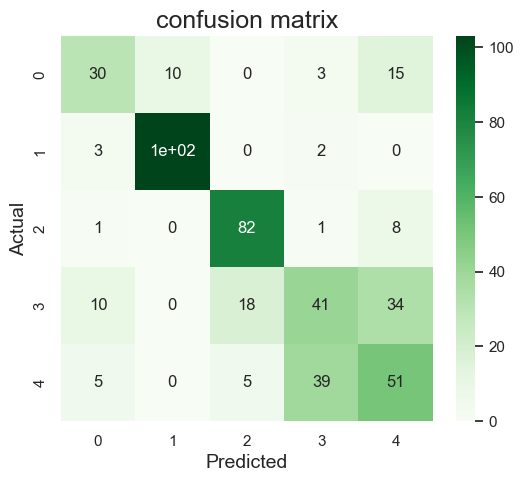

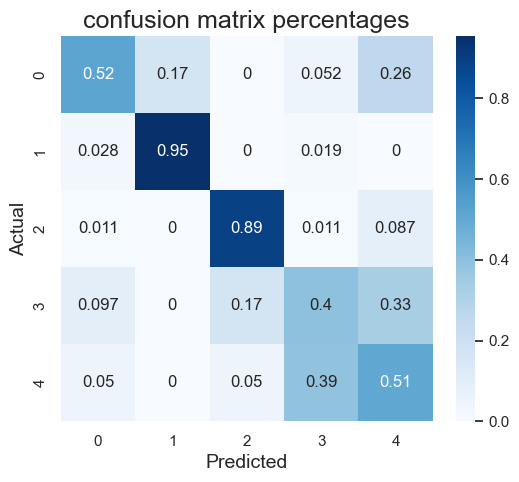

In [ ]:
print_stats(naive_bayes.predict(X_test))

In [ ]:
%%timeit -n 10000
naive_bayes.predict_proba(SAMPLE)

279 µs ± 5.72 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

RandomForestClassifier()

accuracy:	 0.9761388286334056
precision:	 0.9740604569916641
recall:		 0.9665302979578172
f-score:	 0.9698193503023278


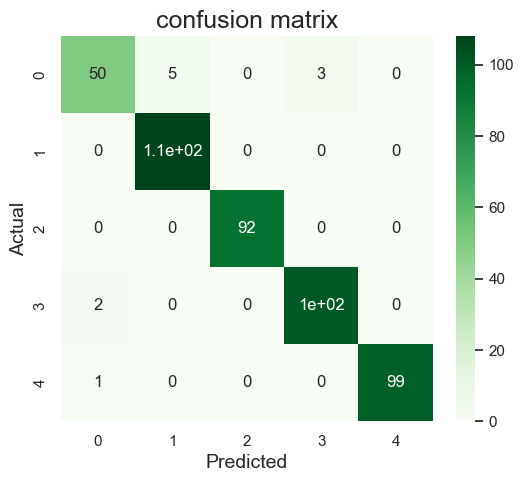

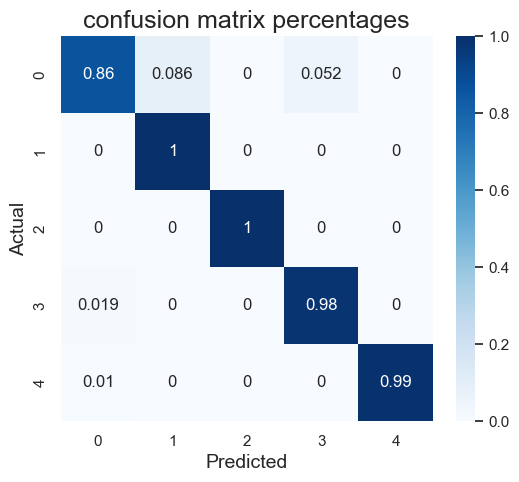

In [ ]:
print_stats(random_forest.predict(X_test))

In [ ]:
%%timeit -n 10000
random_forest.predict_proba(SAMPLE)

7.39 ms ± 222 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)

DecisionTreeClassifier()

accuracy:	 0.8177874186550976
precision:	 0.8040692809876981
recall:		 0.8098464564912797
f-score:	 0.8044299707258421


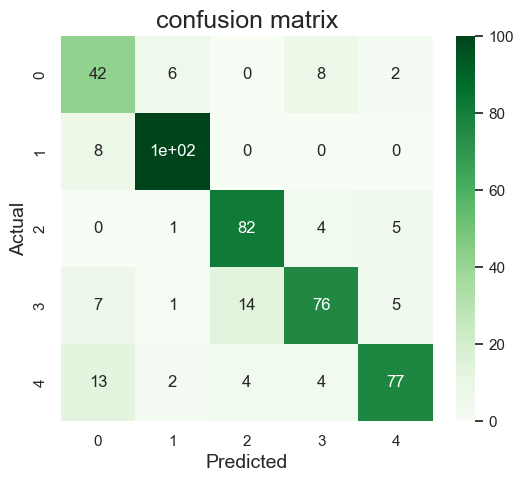

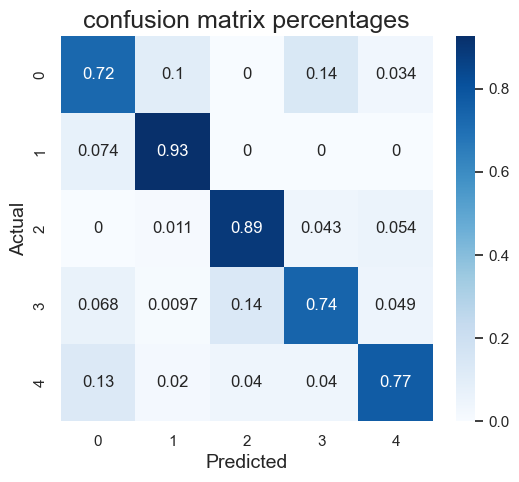

In [ ]:
print_stats(decisiontree.predict(X_test))

In [ ]:
%%timeit -n 10000
decisiontree.predict_proba(SAMPLE)

67 µs ± 4.03 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### K nearest neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k_neighbours = KNeighborsClassifier()
k_neighbours.fit(X_train, y_train)

KNeighborsClassifier()

accuracy:	 0.8828633405639913
precision:	 0.8787804723463413
recall:		 0.8767760294609976
f-score:	 0.868879798986504


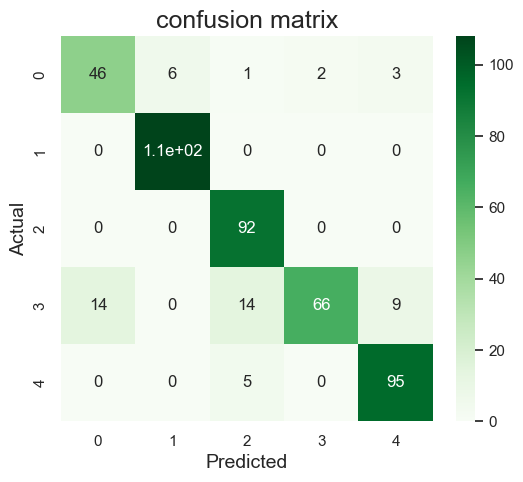

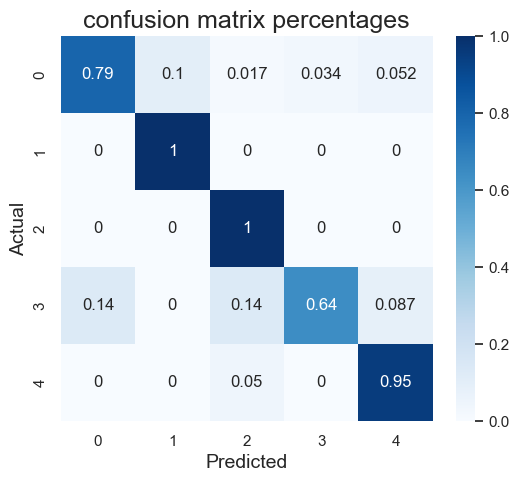

In [ ]:
print_stats(k_neighbours.predict(X_test))

In [ ]:
%%timeit -n 10000
k_neighbours.predict_proba(SAMPLE)

4.64 ms ± 680 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)

AdaBoostClassifier()

accuracy:	 0.6442516268980477
precision:	 0.6649188505062538
recall:		 0.6256142759256834
f-score:	 0.629380575746393


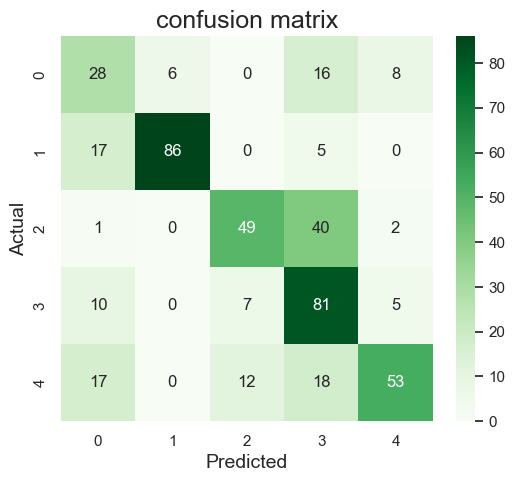

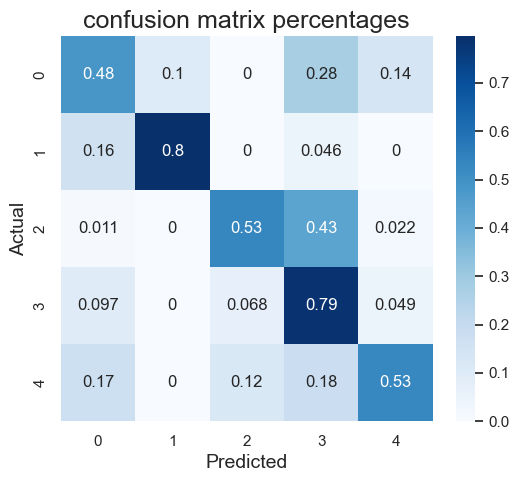

In [ ]:
print_stats(adaboost.predict(X_test))

In [ ]:
%%timeit -n 10000
adaboost.predict_proba(SAMPLE)

### Gaussian Process

In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier

gaussianprocess = GaussianProcessClassifier()
gaussianprocess.fit(X_train, y_train)

KeyboardInterrupt: 

accuracy:	 0.9327548806941431
precision:	 0.9275027690807566
recall:		 0.918687820059765
f-score:	 0.9213701383756707


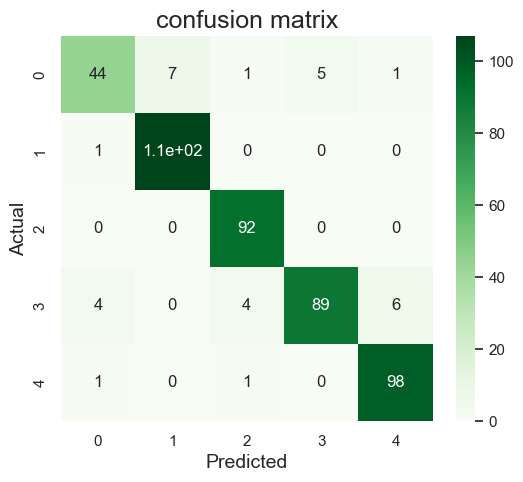

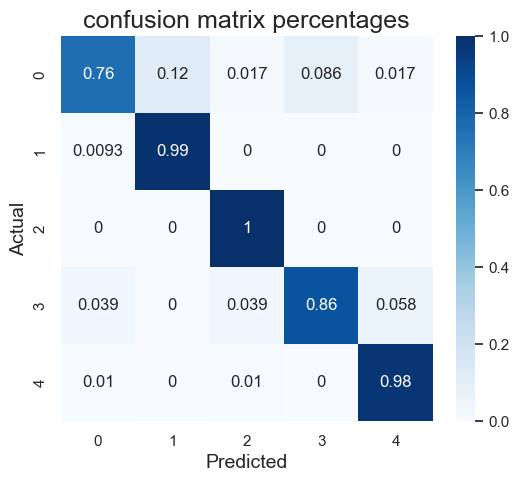

In [ ]:
print_stats(gaussianprocess.predict(X_test))

In [ ]:
%%timeit -n 10000
gaussianprocess.predict_proba(SAMPLE)

324 ms ± 2.84 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Neural Network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

nn = Sequential()
nn.add(layers.Dense(X_train.shape[1], activation='relu', input_shape=(X_train.shape[1],)))
nn.add(layers.Dropout(0.2))
nn.add(layers.Dense(256, activation='relu'))
nn.add(layers.Dropout(0.2))
nn.add(layers.Dense(128, activation='relu'))
nn.add(layers.Dropout(0.2))
nn.add(layers.Dense(64, activation='relu'))
nn.add(layers.Dropout(0.2))
nn.add(layers.Dense(32, activation='relu'))
nn.add(layers.Dense(5, activation='softmax'))


In [ ]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy

nn.compile(optimizer='adam',
              loss= SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
nn.fit(X_train, y_train, epochs=1000, verbose=False)

15/15 [==============================] - 0s 5ms/step
accuracy:	 0.9002169197396963
precision:	 0.893942663561001
recall:		 0.904442187751863
f-score:	 0.8921418818944019


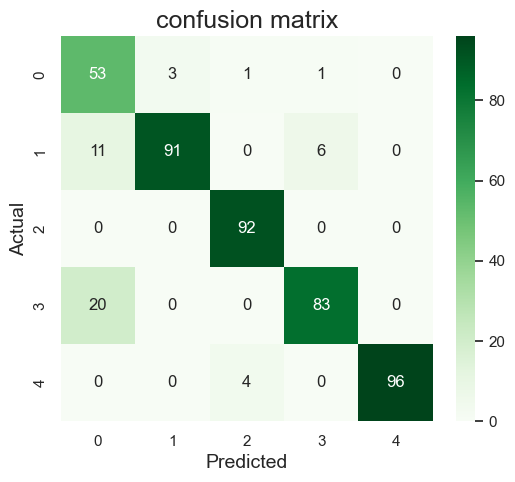

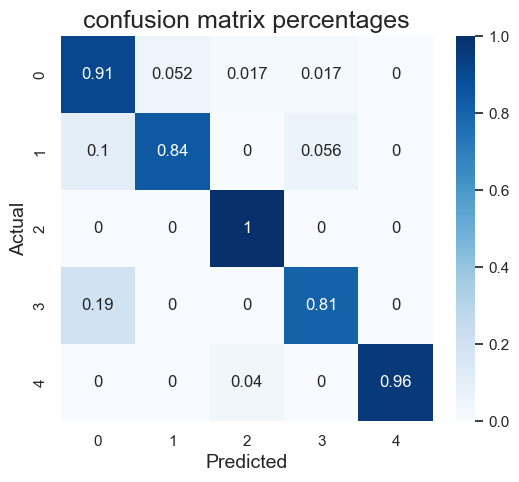

In [ ]:
print_stats(np.argmax(nn.predict(X_test), axis=1))

In [ ]:
%%timeit -n 10000
nn.predict(SAMPLE, verbose=False)

41.6 ms ± 981 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Save Model

In [18]:
from joblib import dump

# save
dump(log_regression, model_path + '/' + log_file)

['./model/logmod.pkl']